install this in the cell below if you do not already have it

In [ ]:
#!pip install imutils

In [1]:
import pandas as pd
pop_tart_imgs=pd.read_csv("pop_tart_imgs.csv")

In [2]:
from imutils import paths
import numpy as np
import imutils
import cv2

def image_colorfulness(image):
    # split the image into its respective RGB components
    (B, G, R) = cv2.split(image.astype("float"))
    # compute rg = R - G
    rg=np.absolute(R - G)
    # compute yb = 0.5 * (R + G) - B
    yb=np.absolute(0.5 * (R + G) - B)
    # compute the mean and standard deviation of both `rg` and `yb`
    (rbMean, rbStd)=(np.mean(rg), np.std(rg))
    (ybMean, ybStd)=(np.mean(yb), np.std(yb))
    # combine the mean and standard deviations
    stdRoot=np.sqrt((rbStd ** 2)+(ybStd ** 2))
    meanRoot=np.sqrt((rbMean ** 2)+(ybMean ** 2))
    # derive the "colorfulness" metric and return it
    return stdRoot+(0.3*meanRoot)

# Replace this path with the path to your image directory
image_directory='/mnt/ufs18/home-235/leonalan/pop-tart box images dataset'

### reproducibility step: Replace "your path to pop-tart box images dataset" with your path

In [ ]:
import pandas as pd
#Replace "your path to pop-tart box images dataset" with your path
pop_tart_imgs['path'] = pop_tart_imgs['path'].str.replace("/mnt/ufs18/home-235/leonalan/", "your path to pop-tart box images dataset")
pop_tart_imgs

In [3]:
# loop over the image paths and update 'Vibrance' column
import imutils
for idx, row in pop_tart_imgs.iterrows():
    imagePath = row['path']
    # load the image, resize it (to speed up computation), and
    # compute the colorfulness metric for the image
    image = cv2.imread(imagePath)
    image = imutils.resize(image, width=250)
    vibrance = image_colorfulness(image)
    # update 'Vibrance' column in the DataFrame
    pop_tart_imgs.at[idx, 'Vibrance'] = vibrance

# Display the updated DataFrame
pop_tart_imgs

,flavor,path,Type,Rating,Reviews,Vibrance,Frosted,Specks,Specks Multicolor,Swirl
0,Frosted Boston Creme Donut Pop-Tarts.png,/mnt/ufs18/home-235/leonalan/pop-tart box imag...,1,4.0,4.0,75.912796,1,0.0,0.0,0.0
1,Simply Frosted Harvest Strawberry Pop-Tarts.png,/mnt/ufs18/home-235/leonalan/pop-tart box imag...,1,4.8,11.0,73.791459,1,1.0,1.0,0.0
2,Frosted Banana Bread Pop-Tarts.png,/mnt/ufs18/home-235/leonalan/pop-tart box imag...,1,4.4,75.0,73.659147,1,0.0,0.0,0.0
3,Frosted Chocolate Chip Pop-Tarts.png,/mnt/ufs18/home-235/leonalan/pop-tart box imag...,1,4.7,88.0,78.706161,1,0.0,0.0,1.0
4,Frosted S'Mores Pop-Tarts.png,/mnt/ufs18/home-235/leonalan/pop-tart box imag...,1,4.7,206.0,83.206668,1,0.0,0.0,0.0
5,Frosted Strawberry Pop-Tarts.png,/mnt/ufs18/home-235/leonalan/pop-tart box imag...,1,4.7,338.0,91.106193,1,1.0,1.0,0.0
6,Frosted Grape Pop-Tarts.png,/mnt/ufs18/home-235/leonalan/pop-tart box imag...,1,4.5,147.0,76.708439,1,1.0,0.0,0.0
7,Frosted Brown Sugar Cinnamon Pop-Tarts.png,/mnt/ufs18/home-235/leonalan/pop-tart box imag...,1,4.8,397.0,80.775880,1,0.0,0.0,0.0
8,Unfrosted Blueberry Pop-Tarts.png,/mnt/ufs18/home-235/leonalan/pop-tart box imag...,1,4.7,71.0,88.434275,0,0.0,0.0,0.0
9,Frosted Cherry Pop-Tarts.png,/mnt/ufs18/home-235/leonalan/pop-tart box imag...,1,4.8,201.0,82.691694,1,1.0,0.0,0.0


### colorfulness metric source: https://pyimagesearch.com/2017/06/05/computing-image-colorfulness-with-opencv-and-python/

In [4]:
pop_tart_imgs['Type'] = pop_tart_imgs['Type'].replace({0: 'Bites', 1: 'Regular'})

In [ ]:
#pop_tart_imgs

Overall Correlation: 0.47378060319352805
Bites Correlation: 0.679690453200889
Regular Correlation: 0.4559879941907476


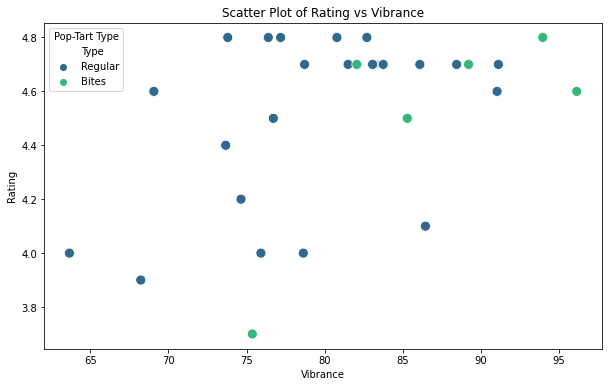

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pop_tart_imgs['Type'] = pop_tart_imgs['Type'].replace({0: 'Bites', 1: 'Regular'})
overall_corr = pop_tart_imgs[['Vibrance', 'Rating']].corr().iloc[0, 1]
bites_corr = pop_tart_imgs[pop_tart_imgs['Type'] == 'Bites'][['Vibrance', 'Rating']].corr().iloc[0, 1]
regular_corr = pop_tart_imgs[pop_tart_imgs['Type'] == 'Regular'][['Vibrance', 'Rating']].corr().iloc[0, 1]
print(f"Overall Correlation: {overall_corr}")
print(f"Bites Correlation: {bites_corr}")
print(f"Regular Correlation: {regular_corr}")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pop_tart_imgs, x='Vibrance', y='Rating', hue='Type', palette='viridis', s=100)
plt.xlabel('Vibrance')
plt.ylabel('Rating')
plt.title('Scatter Plot of Rating vs Vibrance')
plt.legend(title='Pop-Tart Type')
plt.show()

Overall Correlation: 0.47378060319352805
Bites Correlation: 0.679690453200889
Regular Correlation: 0.4559879941907476


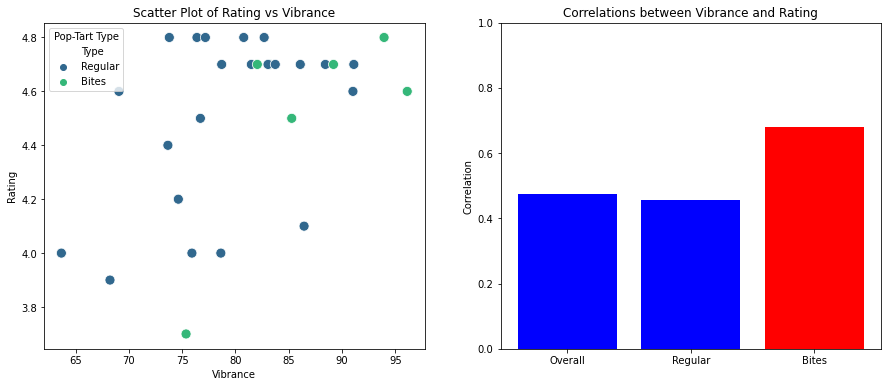

In [7]:
pop_tart_imgs['Type'] = pop_tart_imgs['Type'].replace({0: 'Bites', 1: 'Regular'})
overall_corr = pop_tart_imgs[['Vibrance', 'Rating']].corr().iloc[0, 1]
bites_corr = pop_tart_imgs[pop_tart_imgs['Type'] == 'Bites'][['Vibrance', 'Rating']].corr().iloc[0, 1]
regular_corr = pop_tart_imgs[pop_tart_imgs['Type'] == 'Regular'][['Vibrance', 'Rating']].corr().iloc[0, 1]
print(f"Overall Correlation: {overall_corr}")
print(f"Bites Correlation: {bites_corr}")
print(f"Regular Correlation: {regular_corr}")


fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
sns.scatterplot(data=pop_tart_imgs, x='Vibrance', y='Rating', hue='Type', palette='viridis', s=100, ax=ax1)
ax1.set_xlabel('Vibrance')
ax1.set_ylabel('Rating')
ax1.set_title('Scatter Plot of Rating vs Vibrance')
ax1.legend(title='Pop-Tart Type')

correlations = [overall_corr, regular_corr, bites_corr]
labels = ['Overall', 'Regular', 'Bites']
colors = ['blue' if corr != max(correlations) else 'red' for corr in correlations]
ax2.bar(labels, correlations, color=colors)
ax2.set_ylabel('Correlation')
ax2.set_title('Correlations between Vibrance and Rating')
ax2.set_ylim(0, 1)
plt.show()

In [8]:
pop_tart_imgs = pop_tart_imgs.sort_values(by='Vibrance', ascending=True)
#pop_tart_imgs

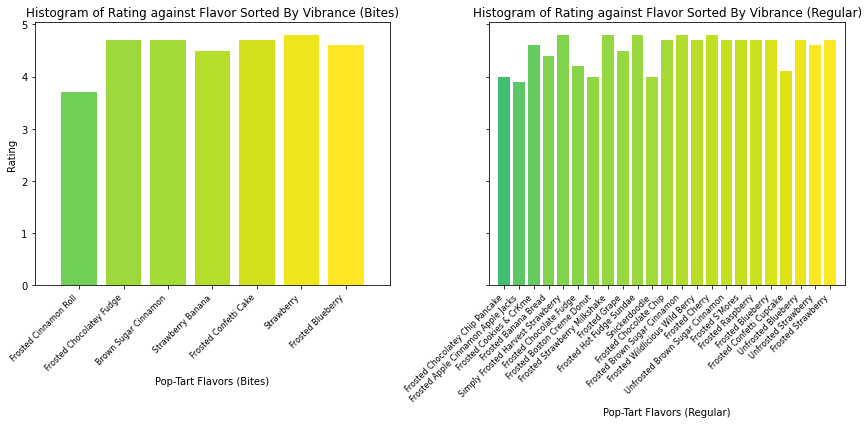

In [9]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
fig, (ax_bites, ax_regular) = plt.subplots(1, 2, sharey=True, figsize=(12, 6))
pop_tart_bites = pop_tart_imgs[pop_tart_imgs['Type'] == 'Bites'].copy()
pop_tart_regular = pop_tart_imgs[pop_tart_imgs['Type'] == 'Regular'].copy()

pop_tart_bites['flavor_code'] = pd.Categorical(pop_tart_bites['flavor']).codes
pop_tart_regular['flavor_code'] = pd.Categorical(pop_tart_regular['flavor']).codes

pop_tart_bites.sort_values(by='Vibrance', inplace=True)
pop_tart_regular.sort_values(by='Vibrance', inplace=True)

colors_bites = plt.cm.viridis(pop_tart_bites['Vibrance'] / pop_tart_bites['Vibrance'].max())
bars_bites = ax_bites.bar(range(len(pop_tart_bites)), pop_tart_bites['Rating'], color=colors_bites, width=0.8)

ax_bites.set_xticks(range(len(pop_tart_bites)))
ax_bites.set_xticklabels([])  

flavor_labels_bites = [flavor.split(' Pop-Tarts')[0] for flavor in pop_tart_bites['flavor']]
ax_bites.set_xticks(range(len(pop_tart_bites)))
ax_bites.set_xticklabels(flavor_labels_bites, rotation=45, ha='right', fontsize=8)

ax_bites.set_xlabel('Pop-Tart Flavors (Bites)')
ax_bites.set_ylabel('Rating')
ax_bites.set_title('Histogram of Rating against Flavor Sorted By Vibrance (Bites)')

ax_bites.set_xlim([-1, len(pop_tart_bites)])

colors_regular = plt.cm.viridis(pop_tart_regular['Vibrance'] / pop_tart_regular['Vibrance'].max())
bars_regular = ax_regular.bar(range(len(pop_tart_regular)), pop_tart_regular['Rating'], color=colors_regular, width=0.8)

ax_regular.set_xticks(range(len(pop_tart_regular)))
ax_regular.set_xticklabels([])  

flavor_labels_regular = [flavor.split(' Pop-Tarts')[0] for flavor in pop_tart_regular['flavor']]
ax_regular.set_xticks(range(len(pop_tart_regular)))
ax_regular.set_xticklabels(flavor_labels_regular, rotation=45, ha='right', fontsize=8)

ax_regular.set_xlabel('Pop-Tart Flavors (Regular)')
ax_regular.set_title('Histogram of Rating against Flavor Sorted By Vibrance (Regular)')

ax_regular.set_xlim([-1, len(pop_tart_regular)])
plt.tight_layout()
plt.show()

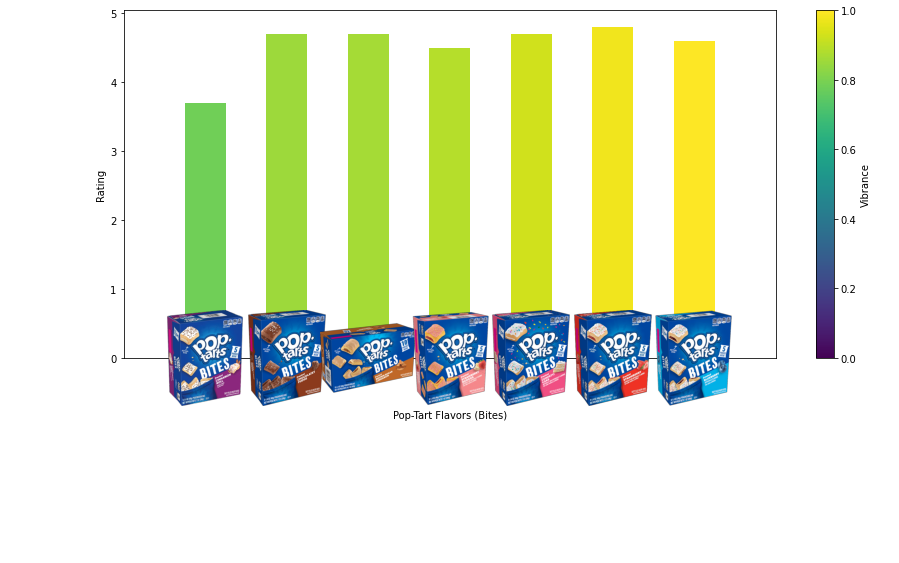

In [10]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
fig, ax_bites = plt.subplots(figsize=(12, 6))
pop_tart_bites = pop_tart_imgs[pop_tart_imgs['Type'] == 'Bites'].copy()
pop_tart_bites['flavor_code'] = pd.Categorical(pop_tart_bites['flavor']).codes
pop_tart_bites.sort_values(by='Vibrance', inplace=True)

colors_bites = plt.cm.viridis(pop_tart_bites['Vibrance'] / pop_tart_bites['Vibrance'].max())
bars_bites = ax_bites.bar(range(len(pop_tart_bites)), pop_tart_bites['Rating'], color=colors_bites, width=0.5)  # Adjust width
ax_bites.set_xticks(range(len(pop_tart_bites)))
ax_bites.set_xticklabels([])

for i, path in enumerate(pop_tart_bites['path']):
    img = plt.imread(path)
    imagebox = OffsetImage(img, zoom=0.15, resample=True)  
    ab = AnnotationBbox(imagebox, (i, 0), boxcoords="data", frameon=False, pad=15)
    ax_bites.add_artist(ab)

ax_bites.set_xlabel('Pop-Tart Flavors (Bites)', labelpad=20)
ax_bites.set_ylabel('Rating')

ax_bites.set_xticklabels(ax_bites.get_xticks(), ha='center', va='top')
ax_bites.xaxis.set_label_coords(0.5, -0.15)  
ax_bites.set_xlim([-1, len(pop_tart_bites)])
cbar_bites = fig.colorbar(plt.cm.ScalarMappable(cmap='viridis'), ax=ax_bites, orientation='vertical')
cbar_bites.set_label('Vibrance')
plt.tight_layout()
plt.show()